#  <span style="color:orange">Predicting Galaxy Metallicity with PyCaret Regression</span>

**Created using: PyCaret 2.2** <br />
**Date Updated: Feb 1, 2021**

__[Adapted from Regression Tutorial (REG102) - Level Beginner](https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)__

# 1.0  Tutorial Objective
This tutorial assumes that you are new to PyCaret and looking to get started applying Regression to astronomy data using the `pycaret.regression` module.

In this tutorial we will learn:

* **Setting up Environment:**  How to setup an experiment in PyCaret and get started with building regression models
* **Create Model:**  How to create a model, perform cross validation and evaluate regression metrics
* **Tune Model:**  How to automatically tune the hyperparameters of a regression model
* **Plot Model:**  How to analyze model performance using various plots
* **Finalize Model:** How to finalize the best model at the end of the experiment
* **Predict Model:**  How to make prediction on new / unseen data
* **Save / Load Model:**  How to save / load a model for future use

# 1.1 Installing PyCaret
The first step to get started with PyCaret is to install PyCaret. Installation is easy and will only take a few minutes. Follow the instructions below:

# Installing PyCaret in Local Jupyter Notebook
`pip install --pre pycaret`  <br />

# Installing PyCaret on Google Colab or Azure Notebooks
`!pip install --pre pycaret`


# 1.2 Pre-Requisites
- Python 3.6 or greater
- PyCaret 2.0 or greater
- Internet connection to load data from pycaret's repository
- Basic Knowledge of Regression

# 1.4 See also:
- __[Regression Tutorial (REG102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)__
- __[Regression Tutorial (REG103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Expert%20-%20REG103.ipynb)__

# 1.5 What is PyCaret?

I'm an astronomer, not an ML expert, so I want to spend my time on physical problems - not technical challenges during the ML experiment cycle.

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is essentially a user friendly Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more. PyCaret is ideal for:

- Experienced ML users who want to increase productivity.
- Astronomers and students who are new to ML and prefer a low code solution.

The package is under active development and currently includes the following modules:

- **Regression**
- **Classification**
- **Clustering**
- **Time Series (beta)**
- **Natural Language Processing**
- **Anomaly detection**
- **Association Rule Mining**

__[Learn More about PyCaret](https://pycaret.gitbook.io/docs/)__

In [1]:
import pycaret

print(pycaret.__version__)

3.0.0.rc8


# 2.0 What is Regression?

Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable', or 'target') and one or more independent variables (often called 'features', 'predictors', or 'covariates'). The objective of regression in machine learning is to predict continuous values such as sales amount, quantity, temperature etc.

__[Learn More about Regression](https://hbr.org/2015/11/a-refresher-on-regression-analysis)__

# 3.0 Overview of the Regression Module in PyCaret
PyCaret's Regression module (`pycaret.regression`) is a supervised machine learning module which is used for predicting continuous values / outcomes using various techniques and algorithms. Regression can be used for predicting values / outcomes such as sales, units sold, temperature or any number which is continuous.

PyCaret's regression module has **over 25 algorithms and 10 plots to analyze the performance of models**. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's regression module has it all.

# 4.0 Dataset for the Tutorial

For this tutorial we will use tablular data for $\sim$30,000 galaxies to choose, train, and test a model for predicting galaxy gas-phase metalicities. The data contains the photometry in the five *ugriz* bands, as well as value added measurements of stellar mass (GSWLC), star formation rates (GSWLC), and gas-phase metalicities (MPA-JHU). Short descriptions of each column are as follows:

- **ID:** Unique identifyer
- **Z:** Redshift
- **petroMag_*ugriz*:** Petrosian magnitude in band from SDSS DR7
- **lgOH_MEDIAN_T04:** Total log(O/H)+12 gas-phase metallicity from MPA-JHU catalogue `Target Column`
- **logMstar_S16:** Total stellar mass from GSWLC
- **logSFR_SED_S16:** Total star formation rate from GSWLC


# Dataset Acknowledgement:
The original dataset description can be [found in Brown+2018.](https://ui.adsabs.harvard.edu/abs/2018MNRAS.473.1868B/abstract)
It uses the [Sloan Digital Sky Survey DR7](https://www.sdss4.org/dr12/spectro/galaxy_mpajhu/), the GALEX-Sloan-WISE Legacy Catalogue [(Salim+16)](https://arxiv.org/abs/1610.00712), and the MPA-JHU catalogue [(Tremonti+2004)](https://arxiv.org/abs/astro-ph/0405537).

# 5.0 Getting the Data

You can download the data from github and load it using pandas __[(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__.

In [2]:
import pandas as pd

dataset = pd.read_csv("../data/sdss_metallicity_data.csv")

# drop rows with missing data
dataset = dataset.dropna()

In [3]:
# check the data
dataset.describe()

,ID,Z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,lgOH_MEDIAN_T04,logMstar_S16,logSFR_SED_S16
count,29562.000000,29562.000000,29562.000000,29562.000000,29562.000000,29562.000000,29562.000000,29562.000000,29562.000000,29562.000000
mean,587324.205500,0.034982,17.211239,15.720272,15.081555,14.754757,14.573281,-54.727458,10.005095,-0.600921
std,255148.111727,0.009591,100.914028,100.898828,100.892953,100.890032,100.888806,53.582196,0.534391,0.780612
min,0.000000,0.010068,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-99.900000,8.144000,-4.154000
25%,412175.500000,0.026562,17.529691,16.018704,15.333058,14.976245,14.756415,-99.900000,9.567000,-0.865000
50%,639011.500000,0.035140,18.269680,16.854943,16.233967,15.908793,15.712407,-99.900000,9.974000,-0.420000
75%,781944.000000,0.043918,18.934386,17.576166,17.000017,16.703108,16.540253,8.774382,10.411000,-0.106000
max,925550.000000,0.050000,36.557720,25.049350,20.477276,19.946150,28.524105,9.309999,11.612000,1.461000


In order to demonstrate the `predict_model()` function on unseen data, we use entries that are missing metallicity estimates from original dataset for predictions.

In [4]:
data = dataset.loc[dataset["lgOH_MEDIAN_T04"] > 7]
data_unseen = dataset.drop(data.index).drop('lgOH_MEDIAN_T04', axis=1)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print("Data for Modeling: " + str(data.shape))
print("Unseen Data For Predictions: " + str(data_unseen.shape))

Data for Modeling: (12282, 10)
Unseen Data For Predictions: (17280, 9)


<AxesSubplot: xlabel='logMstar_S16', ylabel='lgOH_MEDIAN_T04'>

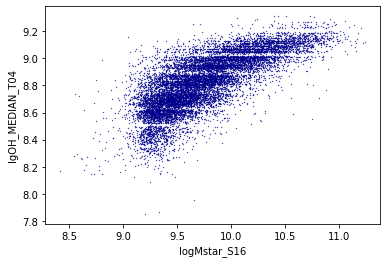

In [5]:
data.plot.scatter(x="logMstar_S16", y="lgOH_MEDIAN_T04", c="DarkBlue",s=0.1)

In [6]:
data.describe()

,ID,Z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,lgOH_MEDIAN_T04,logMstar_S16,logSFR_SED_S16
count,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000
mean,580629.757531,0.036432,15.812025,14.562378,14.064609,13.790054,13.661872,8.827462,9.753535,-0.243474
std,256857.424280,0.008999,156.547959,156.528042,156.520383,156.516172,156.514406,0.204175,0.416899,0.355969
min,0.000000,0.010159,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,7.851740,8.418000,-3.212000
25%,409178.500000,0.029773,17.676838,16.455387,15.948149,15.668969,15.515812,8.684765,9.429000,-0.479000
50%,630756.500000,0.037077,18.324352,17.130306,16.643019,16.377245,16.241022,8.833564,9.683000,-0.263000
75%,784719.500000,0.044596,18.863432,17.684808,17.212861,16.950278,16.828156,8.990748,10.022000,-0.021000
max,925473.000000,0.050000,33.267735,21.953460,20.477276,19.946150,28.524105,9.309999,11.239000,1.461000


# 6.0 Setting up Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's inferred data type using the `numeric_features` and `categorical_features` parameters in `setup()`.

In [7]:
from pycaret.regression import *

exp_reg101 = setup(
    data=data,
    target="lgOH_MEDIAN_T04",  # target column
    log_experiment=True,
    experiment_name="galaxy_metallicity_log",
    imputation_type="iterative",
    ignore_features=["ID"],
)

,Description,Value
0,Session id,3434
1,Target,lgOH_MEDIAN_T04
2,Target type,Regression
3,Original data shape,"(12282, 10)"
4,Transformed data shape,"(12282, 9)"
5,Transformed train set shape,"(8597, 9)"
6,Transformed test set shape,"(3685, 9)"
7,Ignore features,1
8,Numeric features,8
9,Preprocess,True


Once the setup has been successfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. The majority of these features are out of scope for the purposes of this tutorial. However, a few important things to note at this stage include:

- **session_id :**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.<br/>
<br/>
- **Original Data :**  Displays the original shape of dataset. In this experiment (5400, 8) means 5400 samples and 8 features including the target column. <br/>
<br/>
- **Missing Values :**  When there are missing values in the original data, this will show as True. For this experiment there are no missing values in the dataset.<br/>
<br/>
- **Numeric Features :**  Number of features inferred as numeric. In this dataset, 1 out of 8 features are inferred as numeric. <br/>
<br/>
- **Categorical Features :**  Number of features inferred as categorical. In this dataset, 6 out of 8 features are inferred as categorical. <br/>
<br/>
- **Transformed Train Set :** Displays the shape of the transformed training set. Notice that the original shape of (5400, 8) is transformed into (3779, 28) for the transformed train set. The number of features has increased from 8 from 28 due to categorical encoding <br/>
<br/>
- **Transformed Test Set :** Displays the shape of transformed test/hold-out set. There are 1621 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using `train_size` parameter in setup. <br/>

Notice how a few tasks that are imperative to perform modeling are automatically handled, such as missing value imputation (in this case there are no missing values in training data, but we still need imputers for unseen data), categorical encoding etc. Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.



# 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using k-fold cross validation for metric evaluation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) along with training time.

In [8]:
best = compare_models(exclude=["ransac"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0906,0.0141,0.1187,0.6635,0.0122,0.0103,1.9730
lightgbm,Light Gradient Boosting Machine,0.0912,0.0143,0.1195,0.6588,0.0123,0.0104,0.1330
gbr,Gradient Boosting Regressor,0.0925,0.0146,0.1207,0.6517,0.0124,0.0105,1.0400
rf,Random Forest Regressor,0.0931,0.0148,0.1217,0.6463,0.0125,0.0106,2.4300
et,Extra Trees Regressor,0.0942,0.0151,0.1230,0.6385,0.0126,0.0107,0.9620
xgboost,Extreme Gradient Boosting,0.0946,0.0154,0.1239,0.6332,0.0127,0.0108,0.7400
br,Bayesian Ridge,0.0969,0.0157,0.1252,0.6256,0.0128,0.0110,0.0300
lr,Linear Regression,0.0969,0.0157,0.1252,0.6256,0.0128,0.0110,0.5030
knn,K Neighbors Regressor,0.0970,0.0162,0.1272,0.6134,0.0130,0.0111,0.0390
lar,Least Angle Regression,0.0982,0.0163,0.1276,0.6104,0.0131,0.0112,0.0260


Two simple words of code ***(not even a line)*** have trained and evaluated over 20 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using `R2` (highest to lowest) which can be changed by passing `sort` parameter. For example `compare_models(sort = 'RMSLE')` will sort the grid by RMSLE (lower to higher since lower is better). If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold = 5)` will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, compare_models return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter. </br>

Notice that how `exclude` parameter is used to block certain models (in this case `RANSAC`).

# 8.0 Create a Model

`create_model` is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold. 

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

- AdaBoost Regressor ('ada')
- Light Gradient Boosting Machine ('lightgbm') 
- Decision Tree	 ('dt')

There are 25 regressors available in the model library of PyCaret. To see list of all regressors either check the docstring or use `models` function to see the library.

In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


# 8.1 CatBoost Regressor

In [10]:
catboost = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0877,0.0135,0.1163,0.6688,0.0120,0.0100
1,0.0934,0.0150,0.1226,0.6631,0.0126,0.0107
2,0.0882,0.0133,0.1152,0.6835,0.0118,0.0100
3,0.0932,0.0142,0.1193,0.6580,0.0122,0.0106
4,0.0914,0.0145,0.1205,0.6452,0.0123,0.0104
5,0.0915,0.0143,0.1197,0.6600,0.0123,0.0104
6,0.0896,0.0140,0.1185,0.6725,0.0122,0.0102
7,0.0864,0.0124,0.1113,0.6799,0.0114,0.0098
8,0.0912,0.0148,0.1218,0.6591,0.0125,0.0104


In [11]:
catboost

# 8.2 Light Gradient Boosting Machine 

In [12]:
lightgbm = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0880,0.0135,0.1160,0.6705,0.0119,0.0100
1,0.0938,0.0151,0.1230,0.6612,0.0126,0.0107
2,0.0897,0.0138,0.1175,0.6703,0.0120,0.0102
3,0.0934,0.0144,0.1199,0.6543,0.0123,0.0106
4,0.0924,0.0148,0.1218,0.6378,0.0125,0.0105
5,0.0927,0.0146,0.1207,0.6546,0.0124,0.0106
6,0.0902,0.0142,0.1192,0.6683,0.0122,0.0103
7,0.0877,0.0128,0.1133,0.6684,0.0116,0.0100
8,0.0918,0.0149,0.1219,0.6584,0.0125,0.0105


Notice that the Mean score of all models matches with the score printed in `compare_models()`. This is because the metrics printed in the `compare_models()` score grid are the average scores across all CV folds. Similar to `compare_models()`, if you want to change the fold parameter from the default value of 10 to a different value then you can use the `fold` parameter. For Example: `create_model('lightgbm', fold = 5)` to create Decision Tree using 5 fold cross validation.

# 9.0 Tune a Model

When a model is created using the `create_model` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model` function is used. This function automatically tunes the hyperparameters of a model using `Random Grid Search` on a pre-defined search space. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold. To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function (see 9.2 LightGBM tuning below).

# 9.1 CatBoost Regressor

In [13]:
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0882,0.0135,0.1162,0.6693,0.0119,0.0101
1,0.0943,0.0151,0.1231,0.6608,0.0126,0.0108
2,0.0882,0.0132,0.1151,0.6841,0.0118,0.0100
3,0.0927,0.0141,0.1189,0.6602,0.0122,0.0106
4,0.0925,0.0148,0.1215,0.6395,0.0124,0.0105
5,0.0927,0.0145,0.1205,0.6560,0.0124,0.0106
6,0.0899,0.0141,0.1189,0.6698,0.0122,0.0103
7,0.0877,0.0126,0.1122,0.6746,0.0115,0.0100
8,0.0919,0.0149,0.1222,0.6568,0.0126,0.0105


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
tuned_catboost

# 9.2 Light Gradient Boosting Machine

In [15]:
import numpy as np

# grid for HPO
lgbm_params = {
    "num_leaves": np.arange(10, 200, 10),
    "max_depth": [int(x) for x in np.linspace(10, 110, num=11)],
    "learning_rate": np.arange(0.1, 1, 0.1),
}

In [16]:
tuned_lightgbm = tune_model(lightgbm, custom_grid=lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0887,0.0138,0.1173,0.6632,0.0121,0.0101
1,0.0946,0.0152,0.1232,0.6598,0.0127,0.0108
2,0.0895,0.0137,0.1169,0.6741,0.0120,0.0102
3,0.0929,0.0143,0.1195,0.6568,0.0123,0.0106
4,0.0936,0.0151,0.1227,0.6322,0.0126,0.0106
5,0.0920,0.0144,0.1200,0.6588,0.0123,0.0105
6,0.0887,0.0139,0.1179,0.6757,0.0121,0.0101
7,0.0879,0.0128,0.1131,0.6695,0.0116,0.0100
8,0.0912,0.0147,0.1211,0.6628,0.0124,0.0104


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [17]:
print(tuned_lightgbm)

LGBMRegressor(max_depth=60, num_leaves=20, random_state=3434)


By default, `tune_model` optimizes `R2` but this can be changed using optimize parameter. For example: tune_model(rf, optimize = 'MAE') will search for the hyperparameters of a Random Forrest Regressor that results in the lowest `MAE` instead of highest `R2`. 

# 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are over 10 plots available, please see the `plot_model()` docstring for the list of available plots.

# 10.1 Residual Plot

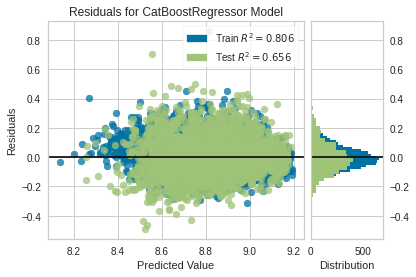

In [18]:
plot_model(tuned_catboost)

# 10.2 Prediction Error Plot

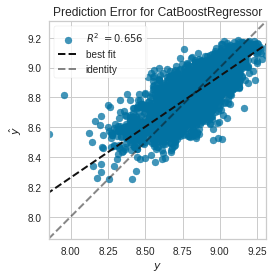

In [19]:
plot_model(tuned_catboost, plot="error")

# 10.3 Feature Importance Plot

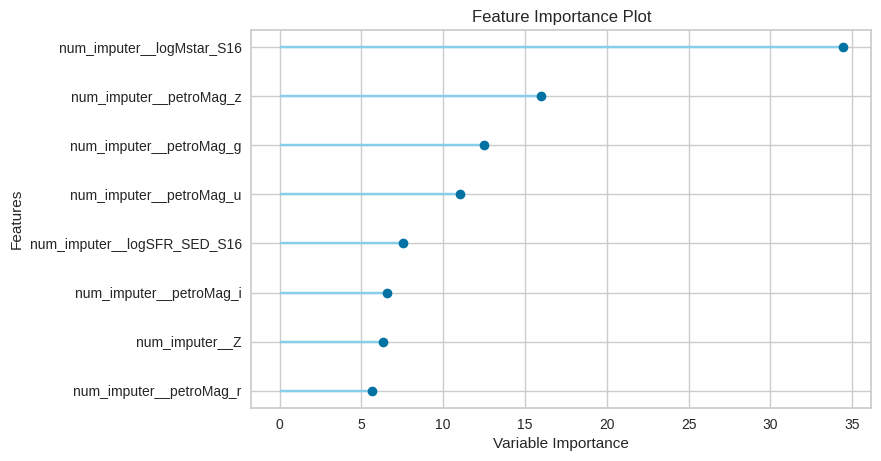

In [20]:
plot_model(tuned_catboost, plot="feature")

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function.

In [21]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# 11.0 Predict on Test / Hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross-validated results based on training set (70%) only. Now, using our final trained model stored in the `tuned_catboost` variable we will predict the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [22]:
predict_model(tuned_catboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0907,0.0141,0.1189,0.6559,0.0122,0.0103


# 12.0 Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [23]:
final_catboost = finalize_model(tuned_catboost)

In [24]:
final_catboost

Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('iterative_imputer',
                 TransformerWrapper(transformer=IterativeImputer(cat_estimator=LGBMClassifier(random_state=3434),
                                                                 cat_estimator_prepare_for_categoricals_type=(LGBMClassifier(random_state=3434),
                                                                                                              {}),
                                                                 categorical_indices=[],
                                                                 max_iter=5,
                                                                 num_estimator=LGBMRegressor(random_state=3434),
                                                                 num_estimator_prepare_for_categoricals_type=(LGBMRegressor(random_state=3434),
                                                                                                              {}),
                                                                 random_state=3434,
                                                                 skip_complete=True))),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7f9f2cd8a8b0>)])

**Caution:** One final word of caution. Once the model is finalized using `finalize_model()`, the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after `finalize_model()` is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use `final_catboost` under `predict_model()` to compare the information grid with the one above in section 11. 

In [25]:
predict_model(final_catboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0739,0.0092,0.0960,0.7760,0.0098,0.0084


# 13.0 Predict on Unseen Data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 10% (600 samples) of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [26]:
unseen_predictions = predict_model(final_catboost, data=data_unseen)
unseen_predictions.head()

,Z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,logMstar_S16,logSFR_SED_S16,prediction_label
0,0.026444,17.287437,15.680633,14.896384,14.504523,14.259768,10.440,-2.474,9.007159
1,0.026444,17.639717,15.913450,15.068103,14.646886,14.366766,10.480,-0.537,9.078650
2,0.026442,17.498098,15.600836,14.838774,14.425499,14.211129,10.457,-0.812,8.984698
3,0.026439,17.077347,15.375058,14.623333,14.252543,13.963070,10.546,-2.747,9.041953
4,0.026436,17.146229,15.888835,15.313497,14.995555,14.815013,10.183,-0.171,9.015403


The `Label` column is added onto the `data_unseen` set. Label is the predicted value using the `final_catboost` model. If you want predictions to be rounded, you can use `round` parameter inside `predict_model()`. You can also check the metrics on this since you have actual target column `Price` available. To do that we will use pycaret.utils module. See example below:

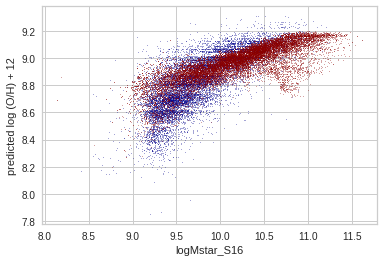

In [27]:
import matplotlib.pyplot as plt

f, a = plt.subplots()
data.plot.scatter(x="logMstar_S16", y="lgOH_MEDIAN_T04", c="DarkBlue", s=0.1, ax=a)
unseen_predictions.plot.scatter(x="logMstar_S16", y="prediction_label", c="DarkRed", s=0.1, ax=a)
_ = a.set_ylabel("predicted log (O/H) + 12")

# 14.0 Saving the Model

We have now finished the experiment by finalizing the `tuned_lightgbm` model which is now stored in `final_lightgbm` variable. We have also used the model stored in `final_lightgbm` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [28]:
save_model(final_catboost, "Final CatBoost Model")

Transformation Pipeline and Model Successfully Saved


(<catboost.core.CatBoostRegressor at 0x7f9f2cb92eb0>,
 'Final CatBoost Model.pkl')

# 15.0 Loading the Saved Model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [29]:
saved_final_catboost = load_model("Final CatBoost Model")

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

In [30]:
new_prediction = predict_model(saved_final_catboost, data=data_unseen)

In [31]:
new_prediction.head()

,Z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,logMstar_S16,logSFR_SED_S16,prediction_label
0,0.026444,17.287437,15.680633,14.896384,14.504523,14.259768,10.440,-2.474,9.007159
1,0.026444,17.639717,15.913450,15.068103,14.646886,14.366766,10.480,-0.537,9.078650
2,0.026442,17.498098,15.600836,14.838774,14.425499,14.211129,10.457,-0.812,8.984698
3,0.026439,17.077347,15.375058,14.623333,14.252543,13.963070,10.546,-2.747,9.041953
4,0.026436,17.146229,15.888835,15.313497,14.995555,14.815013,10.183,-0.171,9.015403


Notice that the results of `unseen_predictions` and `new_prediction` are identical.